In [ ]:
! pip install torch-summary

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import json
from torchsummary import summary
import time
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import librosa.display

IRMAS_PATH = "/content/drive/My Drive/ITCS 5156 project/IRMAS dataset/IRMAS-TrainingData/"
JSON_PATH = "/content/drive/My Drive/ITCS 5156 project/IRMAS dataset/json_files/"
CHECKPOINT_PATH = "/content/drive/My Drive/ITCS 5156 project/trained_models/"

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Ensure that saved checkpoint files are loaded properly

In [ ]:
checkpoint_name = "testing_CNN_1.pt"

model_dict = torch.load(CHECKPOINT_PATH + checkpoint_name)

# Testing Summary

In [ ]:
model_dict.keys()

dict_keys(['filename', 'epochs', 'model_id', 'model_state_dict', 'avg_train_loss_hist', 'std_train_loss_hist', 'avg_val_loss_hist', 'std_val_loss_hist', 'train_acc_hist', 'val_acc_hist', 'dataset_info', 'notes', 'summary'])

In [ ]:
print(model_dict['summary'])

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 38, 257]         320
├─MaxPool2d: 1-2                         [-1, 32, 19, 128]         --
├─BatchNorm2d: 1-3                       [-1, 32, 19, 128]         64
├─Conv2d: 1-4                            [-1, 64, 17, 126]         18,496
├─MaxPool2d: 1-5                         [-1, 64, 8, 63]           --
├─BatchNorm2d: 1-6                       [-1, 64, 8, 63]           128
├─Linear: 1-7                            [-1, 128]                 4,128,896
├─BatchNorm1d: 1-8                       [-1, 128]                 256
├─Linear: 1-9                            [-1, 64]                  8,256
├─BatchNorm1d: 1-10                      [-1, 64]                  128
├─Linear: 1-11                           [-1, 11]                  715
Total params: 4,157,259
Trainable params: 4,157,259
Non-trainable params: 0
Total mult-adds (M): 46.43
Input size (MB): 0.04
Forward/bac

In [ ]:
str(model_dict['notes'])

'\nInitial test of CNN implemented in models.ipynb of notebooks folder on drive.\n\nUsing CrossEntropyLoss\n'

#Plot each checkpoint

In [ ]:
from os import walk, path
import math
import re

In [ ]:
def plot_accuracy(ax, accuracy_dict, header=None, max_X=None, x_tick_sep=1):
  if header and '_' in header:
    header = re.sub(r'(?i)([A-Z])_?([0-9]+)_?', r'\1: \2 ', header[:-3])
  if not max_X:
    max_X = len(accuracy_dict['train_acc_hist'])
  dfTrain = pd.DataFrame([0]+accuracy_dict['train_acc_hist'])
  dfValidate = pd.DataFrame([0]+accuracy_dict['val_acc_hist'])
  ax.set_title(header, fontsize='x-large')
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Epochs')
  ax.set_ylim(0.0,1.0)
  ax.xaxis.grid(True)
  ax.set_xticks([x for x in range(1,max_X+1,x_tick_sep)])
  lval, = ax.plot(dfValidate)
  ltrn, = ax.plot(dfTrain)
  ax.legend([ltrn, lval], ['training', 'validation'])

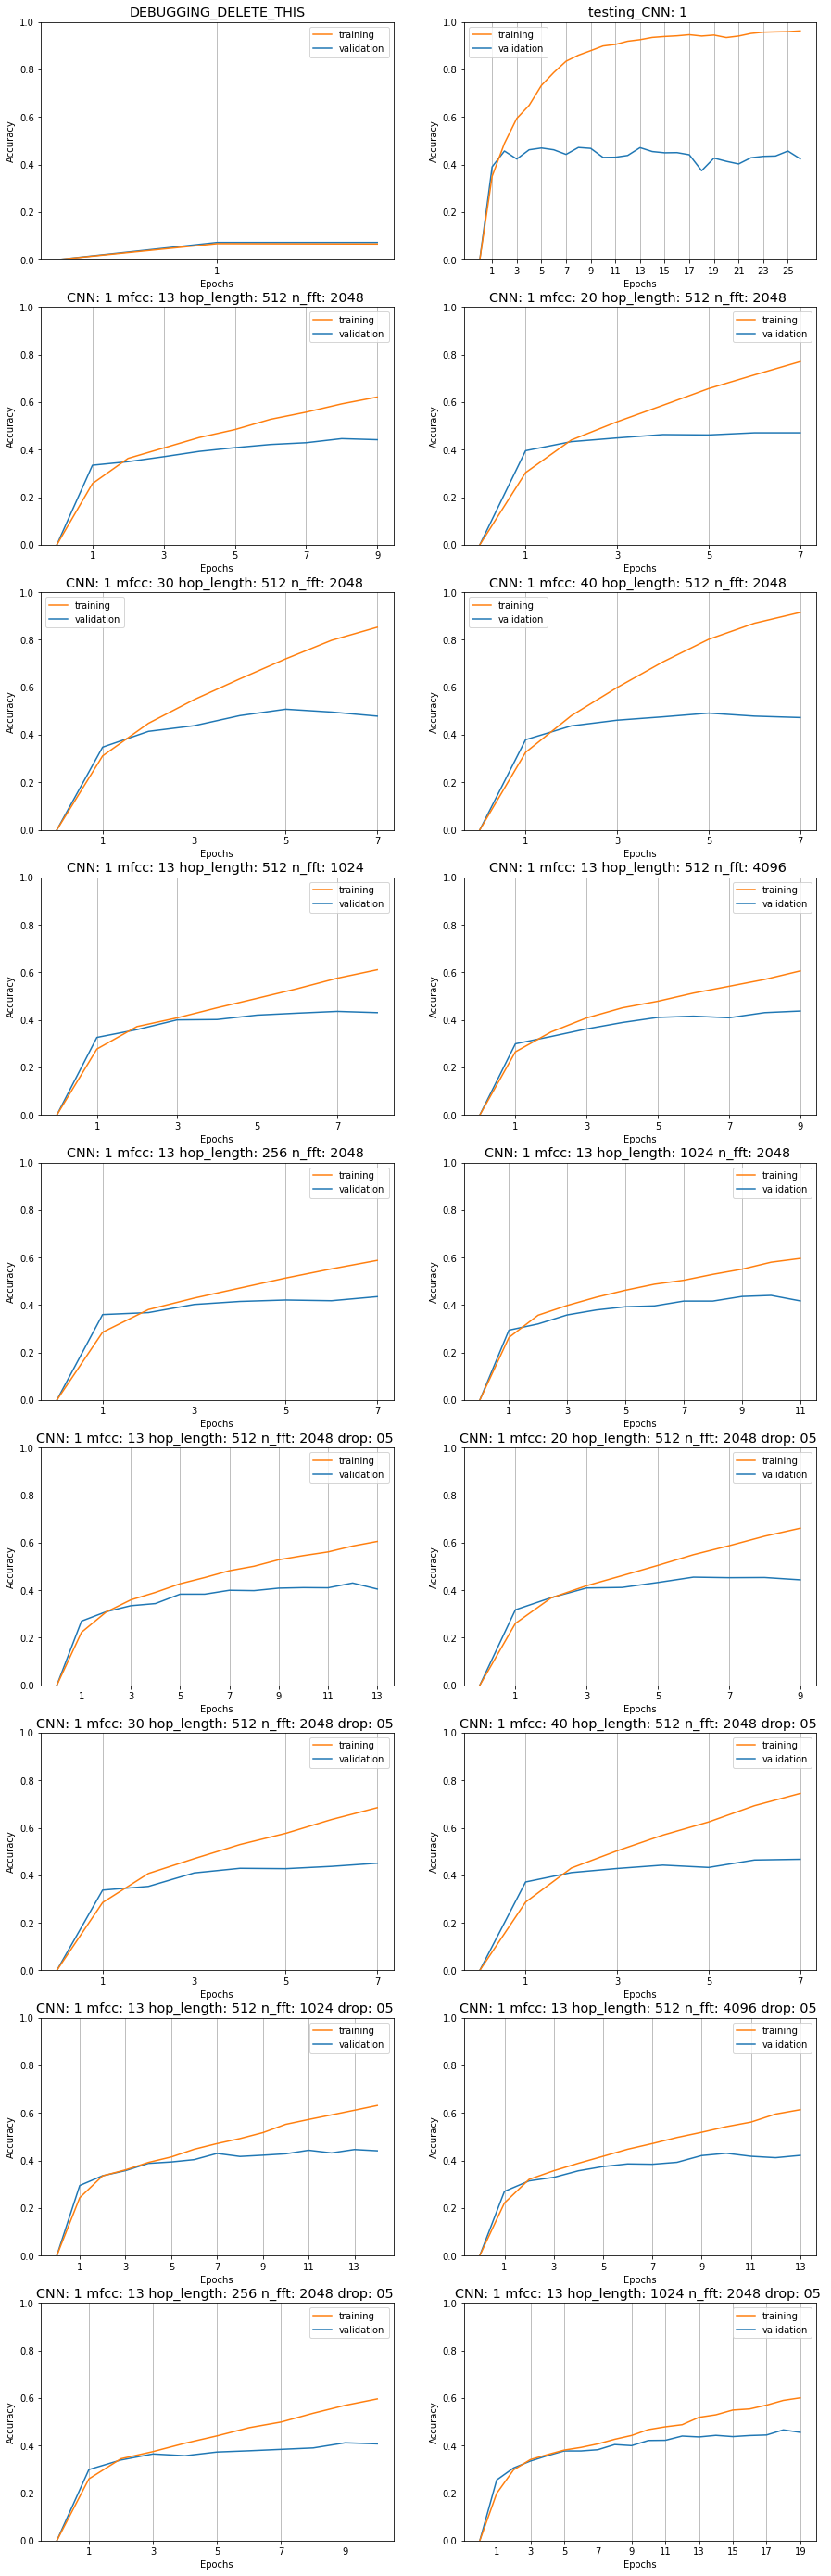

In [ ]:
WIDTH = 2
MAX_EPOCHS = 26
FIG_SIZE = (15, 50)
for root, _, files in walk(CHECKPOINT_PATH):
  fig, axs = plt.subplots(math.ceil(len(files)/WIDTH), WIDTH, figsize=FIG_SIZE)
  for i, file in enumerate(files):
    if file.endswith('.pt'):
      model_dict = torch.load(path.join(root, file))
      ax = axs[i//WIDTH, i%WIDTH]
      plot_accuracy(ax, model_dict, file, MAX_EPOCHS, x_tick_sep=2)

No significant variation in test loss. 